In [151]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold

In [32]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2fd09af03220406897d5d5c070bcf3cc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yyrFG2c8SwlYjCQOU3tFsiOuEzGwxBAWobeJ6D3qQwHa',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2fd09af03220406897d5d5c070bcf3cc.get_object(Bucket='notebooks-donotdelete-pr-h1ooenheppinnz',Key='idh_latin_america.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0

,Unnamed: 0,2018,2015,2010,2005,2000,1995,1990,Cambio
0,Chile,0.847,0.839,0.800,0.788,0.753,0.726,0.703,0.144
1,Argentina,0.830,0.828,0.818,0.777,0.770,0.731,0.707,0.123
2,Uruguay,0.808,0.802,0.774,0.756,0.742,0.710,0.692,0.116
3,Panamá,0.795,0.782,0.758,0.739,0.719,0.688,0.659,0.136
4,Costa Rica,0.794,0.786,0.754,0.727,0.711,0.686,0.655,0.139
5,Cuba,0.779,0.768,0.777,0.730,0.686,0.654,0.676,0.102
6,México,0.767,0.759,0.739,0.729,0.705,0.672,0.652,0.115
7,Brasil,0.760,0.755,0.726,0.699,0.684,0.650,0.613,0.148
8,Colombia,0.761,0.753,0.729,0.692,0.662,0.633,0.599,0.162
9,Perú,0.759,0.750,0.721,0.699,0.679,0.646,0.613,0.146


In [33]:
df_data_0.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df = df_data_0.drop(columns='Cambio')
df

,Country,2018,2015,2010,2005,2000,1995,1990
0,Chile,0.847,0.839,0.800,0.788,0.753,0.726,0.703
1,Argentina,0.830,0.828,0.818,0.777,0.770,0.731,0.707
2,Uruguay,0.808,0.802,0.774,0.756,0.742,0.710,0.692
3,Panamá,0.795,0.782,0.758,0.739,0.719,0.688,0.659
4,Costa Rica,0.794,0.786,0.754,0.727,0.711,0.686,0.655
5,Cuba,0.779,0.768,0.777,0.730,0.686,0.654,0.676
6,México,0.767,0.759,0.739,0.729,0.705,0.672,0.652
7,Brasil,0.760,0.755,0.726,0.699,0.684,0.650,0.613
8,Colombia,0.761,0.753,0.729,0.692,0.662,0.633,0.599
9,Perú,0.759,0.750,0.721,0.699,0.679,0.646,0.613


In [140]:
country_order = dict()
for idx, value in  enumerate(df.Country.values):
    country_order[value] = idx
country_order

{'Chile': 0,
 'Argentina': 1,
 'Uruguay': 2,
 'Panamá': 3,
 'Costa Rica': 4,
 'Cuba': 5,
 'México': 6,
 'Brasil': 7,
 'Colombia': 8,
 'Perú': 9,
 'República Dominicana': 10,
 'Venezuela': 11,
 'Paraguay': 12,
 'Bolivia': 13,
 'El Salvador': 14,
 'Guatemala': 15,
 'Nicaragua': 16,
 'Honduras': 17,
 'Haití': 18}

In [185]:
#linear reg x:year y:idh
Y = df.values[:,2:]
X = df.columns[2:]

In [188]:
#kfold
X = df.values[:,2:]
Y = df.values[:,1]

In [205]:
kf = KFold(n_splits=8)
kf.get_n_splits(X)

regr = linear_model.LinearRegression()

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_test)
    if r2_score(y_test, predictions) > 0: #r^2 function lacks when (yi-ybar) tends to zero
        print("R2: ", r2_score(y_test, predictions))
        results.append(r2_score(y_test, predictions))
    
print("R2 medio:", np.mean(results))

R2:  0.483549061055624
R2:  0.7850663221446234
R2:  0.9951500538741562
R2 medio: 0.7545884790248012


In [186]:
X = np.array([float(x) for x in X])


For each iterartion
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.02

For each iterartion
Mean absolute error: 0.12
Residual sum of squares (MSE): 0.02

For each iterartion
Mean absolute error: 0.09
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01

For each iterartion
Mean absolute error: 0.07
Residual sum of squares (MSE): 0.01

For

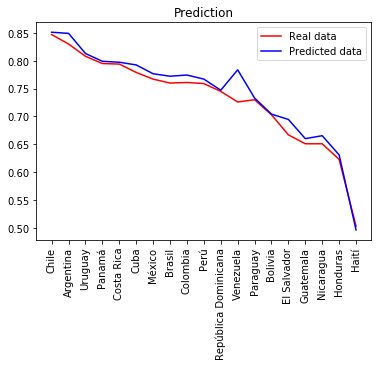

In [187]:
regr = linear_model.LinearRegression()
test_y_hat_list = []
for country_idh in Y:
    sc = StandardScaler()
    
    y_train = np.array(country_idh).astype(np.float64)
    y_test = np.array(df.values[:,1]).astype(np.float64)
    X_train = X.reshape(-1,1).astype(np.float64)
    X_test = np.array(df.columns[1]).reshape(-1,1).astype(np.float64)
    regr.fit(X_train, y_train)
    test_y_hat = regr.predict(X_test)
    test_y_hat_list.append(test_y_hat)



    print("\nFor each iterartion\nMean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))

print("\nResume\nMean absolute error: %.2f" % np.mean(np.absolute(np.array(test_y_hat_list) - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((np.array(test_y_hat_list) - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, np.array(test_y_hat_list)) )
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(np.array(test_y_hat_list), color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.xticks(np.array(list(country_order.values())), np.array(list(country_order.keys())), rotation=90)
plt.legend()
plt.show()

In [84]:
'''
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    
    model.add(Dense(units = 32, activation = 'relu'))

    # Adding the third hidden layer
    model.add(Dense(units = 32, activation = 'relu'))

    # Adding the output layer
    model.add(Dense(units = 1))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
'''

"\ndef baseline_model():\n    # create model\n    model = Sequential()\n    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))\n    \n    model.add(Dense(units = 32, activation = 'relu'))\n\n    # Adding the third hidden layer\n    model.add(Dense(units = 32, activation = 'relu'))\n\n    # Adding the output layer\n    model.add(Dense(units = 1))\n    \n    # Compile model\n    model.compile(loss='mean_squared_error', optimizer='adam')\n    return model\n"

In [85]:
'''
m = baseline_model()
for country_idh in Y:
    sc = StandardScaler()
    y_train = np.array(country_idh)
    y_test = np.array(df.values[:,1])
    X_train = sc.fit_transform(X.reshape(-1, 1))
    X_test = np.array(df.columns[1]).reshape(-1,1)
    X_test = sc.transform(X_test)
    m.fit(X_train, y_train, batch_size = 10, epochs = 100)
    
    y_pred = m.predict(X_test)

    plt.plot(y_test, color = 'red', label = 'Real data')
    plt.plot(y_pred, color = 'blue', label = 'Predicted data')
    plt.title('Prediction')
    plt.legend()
    plt.show()
'''

"\nm = baseline_model()\nfor country_idh in Y:\n    sc = StandardScaler()\n    y_train = np.array(country_idh)\n    y_test = np.array(df.values[:,1])\n    X_train = sc.fit_transform(X.reshape(-1, 1))\n    X_test = np.array(df.columns[1]).reshape(-1,1)\n    X_test = sc.transform(X_test)\n    m.fit(X_train, y_train, batch_size = 10, epochs = 100)\n    \n    y_pred = m.predict(X_test)\n\n    plt.plot(y_test, color = 'red', label = 'Real data')\n    plt.plot(y_pred, color = 'blue', label = 'Predicted data')\n    plt.title('Prediction')\n    plt.legend()\n    plt.show()\n"